In [ ]:
pip install labelImg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 13.3 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261520 sha256=f1e1e3e29438b82ec5d81744190b42667955a3e5f311e511edfd489465a88c7e
  Stored in directory: /root/.cache/pip/wheels/d9/f0/1e/74c509495458cad13a0fda23fe605e643177625cf2b5c17b34
Successfully built labelImg


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d mehaksingal/illegible-medical-prescription-images-dataset

Dataset URL: https://www.kaggle.com/datasets/mehaksingal/illegible-medical-prescription-images-dataset
License(s): MIT
 41% 10.0M/24.5M [00:00<00:00, 33.6MB/s]
100% 24.5M/24.5M [00:00<00:00, 68.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pre.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import easyocr
import os
import cv2
import json


In [ ]:
pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.8 MB/s eta 0:00:00


In [ ]:
output_dir = 'labeled_data'
os.makedirs(output_dir, exist_ok=True)


In [ ]:
reader = easyocr.Reader(['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
import easyocr
import os
import json
import numpy as np
import cv2


reader = easyocr.Reader(['en'])


image_folder = '/content/labelled'
output_dir = 'labeled_data'
output_visual_dir = 'visualized_data'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_visual_dir, exist_ok=True)

def convert_to_standard_types(data):
    """Convert NumPy types to standard Python types for JSON serialization."""
    if isinstance(data, np.ndarray):
        return data.tolist()
    elif isinstance(data, (np.int64, np.float64)):
        return data.item()
    elif isinstance(data, dict):
        return {k: convert_to_standard_types(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [convert_to_standard_types(i) for i in data]
    else:
        return data

def draw_text_boxes(image, labeled_data):
    """Draw bounding boxes and text on the image."""
    for item in labeled_data:
        bbox = item['bbox']
        text = item['text']
        probability = item['probability']


        for i in range(len(bbox)):
            start_point = (int(bbox[i][0]), int(bbox[i][1]))
            end_point = (int(bbox[(i + 1) % 4][0]), int(bbox[(i + 1) % 4][1]))
            cv2.line(image, start_point, end_point, (0, 255, 0), 2)


        cv2.putText(image, f'{text} ({probability:.2f})', (int(bbox[0][0]), int(bbox[0][1] - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)


for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_folder, image_file)


        result = reader.readtext(image_path)


        labeled_data = []
        for bbox, text, prob in result:
            labeled_data.append
                'bbox': convert_to_standard_types(bbox),
                'text': text,
                'probability': float(prob)


        output_file = os.path.join(output_dir, f'{os.path.splitext(image_file)[0]}.json')
        with open(output_file, 'w') as f:
            json.dump(labeled_data, f, indent=4)


        image = cv2.imread(image_path)


        draw_text_boxes(image, labeled_data)


        output_visual_path = os.path.join(output_visual_dir, image_file)
        cv2.imwrite(output_visual_path, image)

        print(f'Processed and visualized {image_file}')


Processed and visualized 75.jpg
Processed and visualized 28.jpg
Processed and visualized 74.jpg
Processed and visualized 9.jpg
Processed and visualized 32.jpg


In [ ]:
pip install opencv-python


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Processing image: 75.jpg


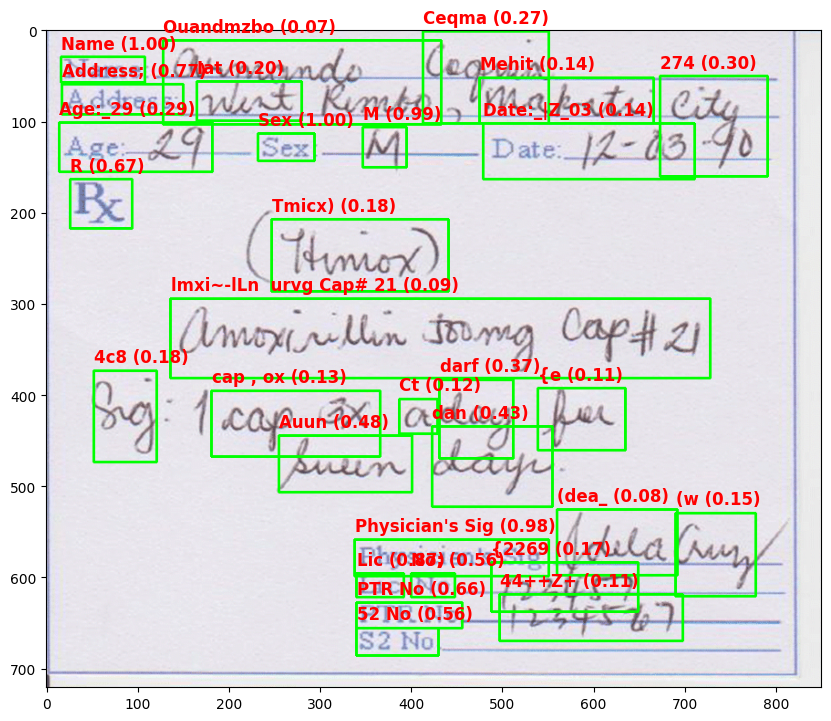

Extracted Text from 75.jpg:
Name Address; Ouandmzbo Iat Mehit Age:_29 Sex M Date:_|Z_03 274 R Tmicx) lmxi~-lLn  urvg Cap# 21 cap , ox Ct {e Auun Physician's Sig (dea_ Lic No; {2269 PTR No 44++Z+ 52 No Ceqma 4c8 darf dan (w 

Precision: 0.33
Recall: 0.33
F1 Score: 0.33
Visualized and saved 75.jpg
Processing image: 28.jpg


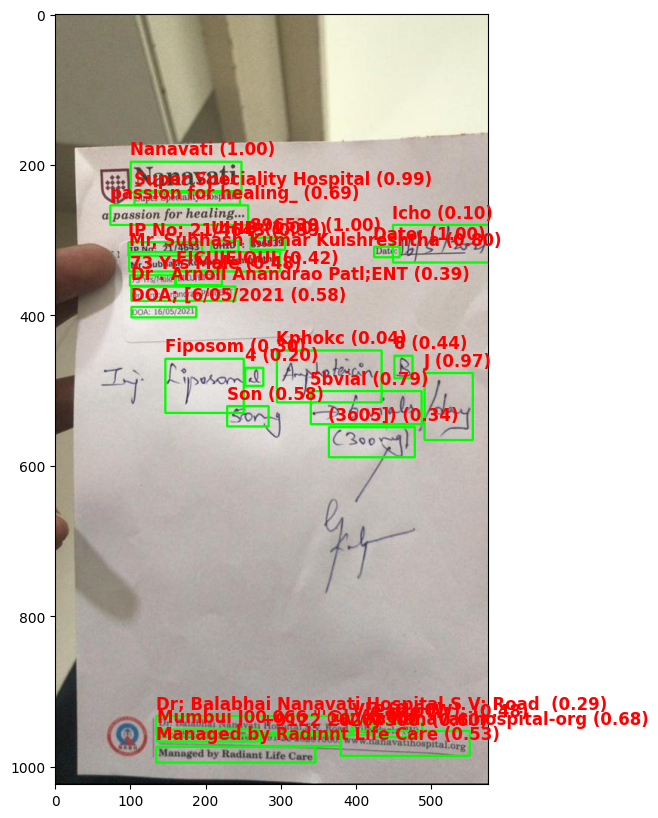

Extracted Text from 28.jpg:
Nanavati Super Speciality Hospital passion for healing_ IP No; 21/4643 UHID 896539 Date: Icho Mr, Subhash Kumar Kulshreshtha 73 Yrs Male FICUJEIQUI Dr . Arnoll Anandrao Patl;ENT DOA; [6/05/2021 4 Kphokc 8 Son 5bvial (3o05]) Dr; Balabhai Nanavati Hospital,S V; Road  Parle (W); Mumbui J00 066 "'@l: +9122 26267500. Managed by Radinnt Life Care www nanavatihospital-org Fiposom J Vle 

Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Visualized and saved 28.jpg
Processing image: 74.jpg


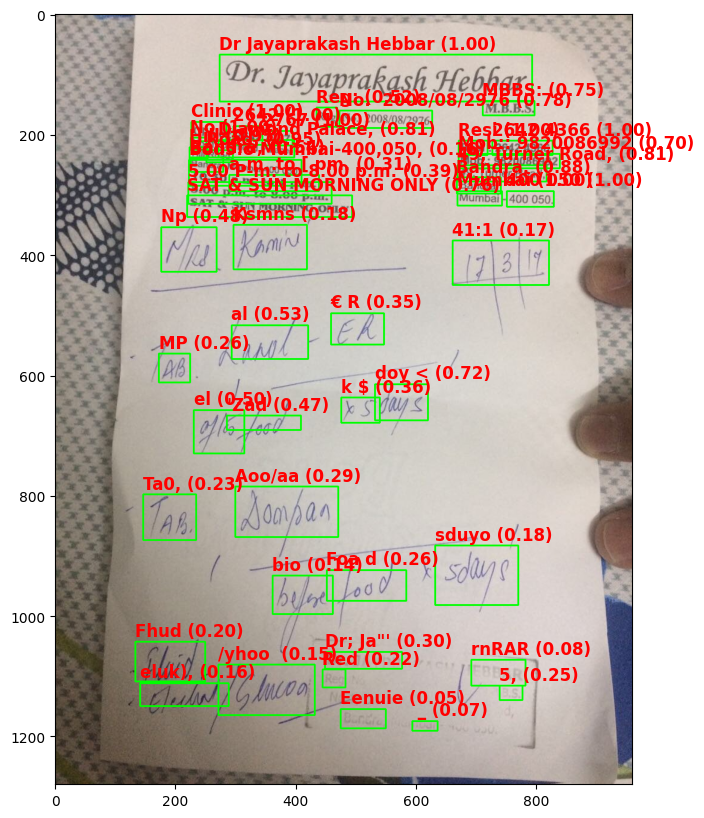

Extracted Text from 74.jpg:
Dr Jayaprakash Hebbar MBBS: No.  2008/08/2976 No 2767 Hill Diamond Palace, Resi 2642 4366 Road, Mob:: 9820086992 Bod5.o Mumbai-400,050, 49, Turner Road, a.m. to [ pm. Bandra, 5.00 P-m: to 8.00 p.m. Mumbai 400 050 SAT & SUN MORNING ONLY Np Ksmns 41:1 MP k $ doy < el Ta0, Aoo/aa bio sduyo Dr; Ja"' /yhoo  5, Eenuie  _ Reg: Clinic 2642 Bandra, € R al 'Zad Foa d Fhud rnRAR Red eluk), 

Precision: 0.39
Recall: 0.39
F1 Score: 0.39
Visualized and saved 74.jpg
Processing image: 9.jpg


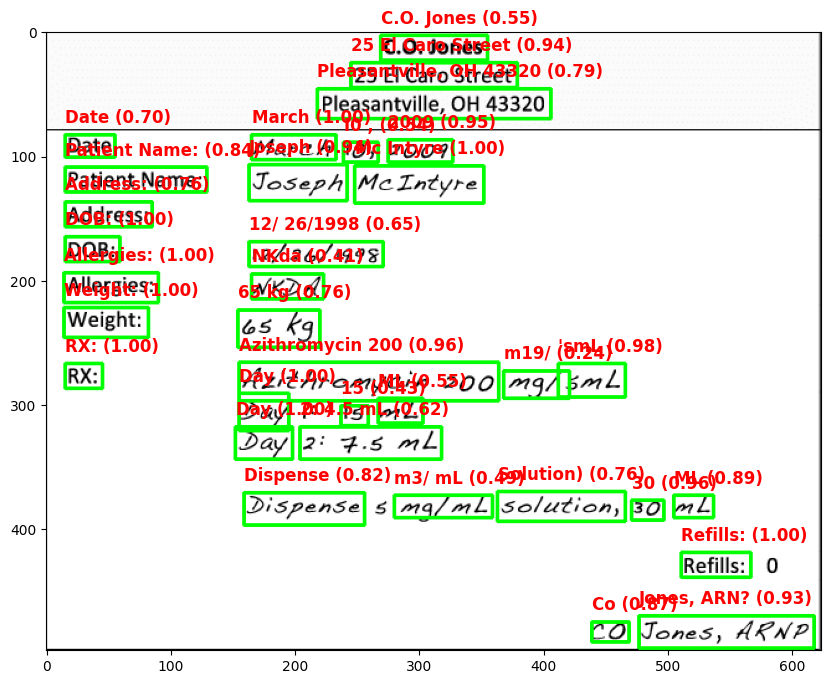

Extracted Text from 9.jpg:
C.O. Jones 25 El Caro Street Pleasantville, OH 43320 Date March I0 , 2009 Patient Name: Joseph Mc Intyre Address: DOB: 12/ 26/1998 Allergies: NKda Weight: 65 kg RX: Azithromycin 200 'smL 15 ML Day 2: 4.5 mL Dispense Solution) 30 ML Refills: Co Jones, ARN? m19/ Day m3/ mL 

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Visualized and saved 9.jpg
Processing image: 32.jpg


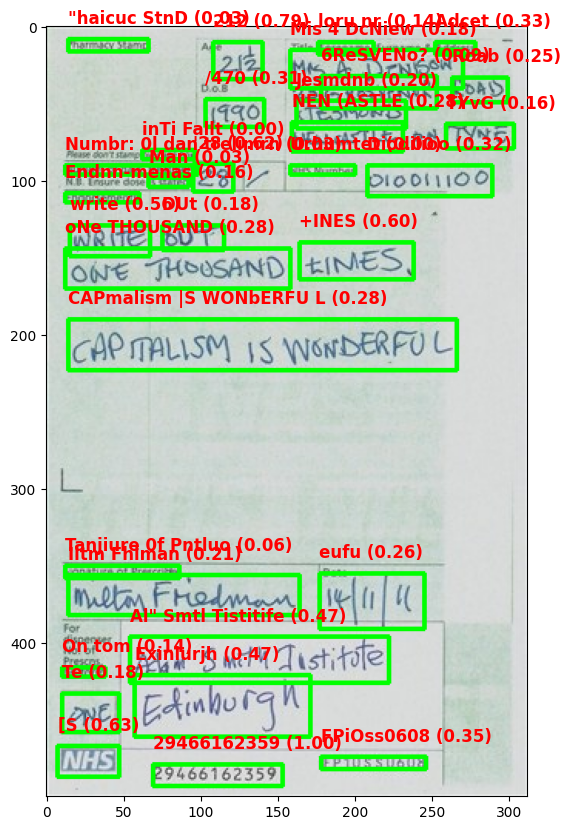

Extracted Text from 32.jpg:
"haicuc StnD loru nr Adcet 212 Mis 4 DcNiew 6ReSVENo? Roab /470 Jesmdnb NEN (ASTLE TYvG inTi Fallt Numbr: 0l dan trelimrn Urhumtet Man '28 Diodilioo Endnn-menas write DUt oNe THOUSAND +INES CAPmalism |S WONbERFU L Tanjiure 0f Pntluo Iltm Fhlman eufu On tom Al" Smtl Tistitife Te Exinlurjh [S FPiOss0608 29466162359 

Precision: 0.28
Recall: 0.28
F1 Score: 0.28
Visualized and saved 32.jpg


In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import os
import json
import numpy as np
from sklearn.metrics import precision_recall_fscore_support


reader = easyocr.Reader(['en'])


image_dir = '/content/data'
labeled_dir = 'labeled_data'


output_visual_dir = 'visualized_data'
os.makedirs(output_visual_dir, exist_ok=True)

def convert_to_standard_types(data):

    if isinstance(data, np.ndarray):
        return data.tolist()
    elif isinstance(data, (np.int64, np.float64)):
        return data.item()
    elif isinstance(data, dict):
        return {k: convert_to_standard_types(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [convert_to_standard_types(i) for i in data]
    else:
        return data

def draw_text_boxes(image, labeled_data):

    for item in labeled_data:
        bbox = item['bbox']
        text = item['text']
        probability = item['probability']


        for i in range(len(bbox)):
            start_point = (int(bbox[i][0]), int(bbox[i][1]))
            end_point = (int(bbox[(i + 1) % 4][0]), int(bbox[(i + 1) % 4][1]))
            cv2.line(image, start_point, end_point, (0, 255, 0), 2)


        cv2.putText(image, f'{text} ({probability:.2f})', (int(bbox[0][0]), int(bbox[0][1] - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

def extract_and_display_text(image_path):


    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    result = reader.readtext(img)


    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img_rgb)


    all_text = ""

    for (bbox, text, prob) in result:

        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        img_rgb = cv2.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), 2)

        ax.text(top_left[0], top_left[1] - 10, f'{text} ({prob:.2f})', color='red', fontsize=12, weight='bold')


        all_text += f'{text} '


    ax.imshow(img_rgb)
    plt.show()


    print(f"Extracted Text from {os.path.basename(image_path)}:")
    print(all_text)
    print()

def evaluate_ocr(image_path, json_path):

    img = cv2.imread(image_path)


    result = reader.readtext(img)


    with open(json_path, 'r') as f:
        labeled_data = json.load(f)


    ground_truth_texts = [item['text'] for item in labeled_data]
    predicted_texts = [text for _, text, _ in result]


    min_length = min(len(ground_truth_texts), len(predicted_texts))
    ground_truth_texts = ground_truth_texts[:min_length]
    predicted_texts = predicted_texts[:min_length]


    precision, recall, f1, _ = precision_recall_fscore_support(ground_truth_texts, predicted_texts, average='weighted', zero_division=0)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


for image_file in os.listdir(image_dir):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(image_dir, image_file)
        json_path = os.path.join(labeled_dir, f'{os.path.splitext(image_file)[0]}.json')

        if os.path.exists(json_path):
            print(f"Processing image: {image_file}")
            extract_and_display_text(image_path)
            evaluate_ocr(image_path, json_path)

            img = cv2.imread(image_path)
            draw_text_boxes(img, json.load(open(json_path)))
            output_visual_path = os.path.join(output_visual_dir, image_file)
            cv2.imwrite(output_visual_path, img)
            print(f"Visualized and saved {image_file}")
from sklearn.metrics import accuracy_score

def evaluate_ocr(image_path, json_path):

    print(f"Evaluating OCR for {image_path}...")


    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return


    print("Performing OCR...")
    result = reader.readtext(img)
    if not result:
        print("No text detected by OCR.")
        return


    print(f"Loading labeled data from {json_path}...")
    try:
        with open(json_path, 'r') as f:
            labeled_data = json.load(f)
    except Exception as e:
        print(f"Error loading JSON: {e}")
        return


    ground_truth_texts = [item['text'] for item in labeled_data]
    predicted_texts = [text for _, text, _ in result]

    if len(ground_truth_texts) == 0:
        print("No ground truth texts found.")
        return
    if len(predicted_texts) == 0:
        print("No predicted texts found.")
        return

    print("Ground Truth Texts:", ground_truth_texts)
    print("Predicted Texts:", predicted_texts)


    min_length = min(len(ground_truth_texts), len(predicted_texts))
    ground_truth_texts = ground_truth_texts[:min_length]
    predicted_texts = predicted_texts[:min_length]


    accuracy = accuracy_score(ground_truth_texts, predicted_texts)


    precision, recall, f1, _ = precision_recall_fscore_support(ground_truth_texts, predicted_texts, average='weighted', zero_division=0)


    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")



In [ ]:

pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 18.8 MB/s eta 0:00:00


In [ ]:
import easyocr

# Initialize the reader with the languages you need (e.g., English)
reader = easyocr.Reader(['en'])  # You can add more languages, e.g., ['en', 'fr']


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
import os
import cv2
import easyocr

# Initialize the OCR reader (use 'en' for English)
reader = easyocr.Reader(['en'])

# Directory where images are stored
image_dir = '/content/drive/MyDrive/OCR/data'

# Loop through all image files in the directory
for image_file in os.listdir(image_dir):
    # Ensure only image files are processed
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        try:
            # Construct the full image path
            image_path = os.path.join(image_dir, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Check if the image was loaded successfully
            if image is None:
                print(f"Error: Could not load image {image_file}. Skipping.")
                continue  # Skip to the next image

            # Apply EasyOCR to detect text
            results = reader.readtext(image_path)

            # Check if results are empty
            if not results:
                print(f"No text detected in {image_file}. Skipping.")
                continue  # Skip to the next image

            # Process results and draw bounding boxes
            for (bbox, text, confidence) in results:
                print(f"Detected text: {text} with confidence: {confidence}")
                print(f"Bounding box: {bbox}")

                # Extract bounding box coordinates
                top_left = tuple([int(val) for val in bbox[0]])  # (x1, y1)
                bottom_right = tuple([int(val) for val in bbox[2]])  # (x2, y2)

                # Draw the bounding box on the image
                cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

                # Annotate the image with the detected text
                cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Display the annotated image (You can skip this on Colab and save instead)
            cv2.imshow("Annotated Image", image)
            cv2.waitKey(0)  # Wait for a key press to move to the next image

            # Optionally, save the image with annotations to a new directory
            output_path = os.path.join('/content/drive/MyDrive/OCR/Output_images(jpg)', image_file)
            cv2.imwrite(output_path, image)

        except Exception as e:
            # Print any errors encountered during processing
            print(f"Error processing {image_file}: {str(e)}")



Streaming output truncated to the last 5000 lines.
Detected text: Neok with confidence: 0.9988359212875366
Bounding box: [[85, 142], [122, 142], [122, 160], [85, 160]]
Detected text: 2TT with confidence: 0.4903932148330328
Bounding box: [[86, 159], [137, 159], [137, 177], [86, 177]]
Detected text: Thyroid with confidence: 0.9999041174830237
Bounding box: [[86, 174], [131, 174], [131, 192], [86, 192]]
Detected text: TTHTHI 4rr with confidence: 0.1106283282785571
Bounding box: [[85, 193], [163, 193], [163, 209], [85, 209]]
Detected text: Lympth Nodes with confidence: 0.9909065489624105
Bounding box: [[82, 206], [173, 206], [173, 225], [82, 225]]
Detected text: Guwshsl with confidence: 0.17470868629910472
Bounding box: [[346, 186], [444, 186], [444, 240], [346, 240]]
Detected text: 87) with confidence: 0.7656443719331517
Bounding box: [[526, 202], [564, 202], [564, 230], [526, 230]]
Detected text: 84/ak* with confidence: 0.14449382745200773
Bounding box: [[566, 192], [686, 192], [686, 244

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import cv2
import easyocr

# Initialize the OCR reader (use 'en' for English)
reader = easyocr.Reader(['en'])

# Directory where images are stored
image_dir = '/content/drive/MyDrive/OCR/data'
output_dir = '/content/drive/MyDrive/OCR/Output_images(jpg)'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all image files in the directory
for image_file in os.listdir(image_dir):
    # Ensure only image files are processed
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        try:
            # Construct the full image path
            image_path = os.path.join(image_dir, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Check if the image was loaded successfully
            if image is None:
                print(f"Error: Could not load image {image_file}. Skipping.")
                continue  # Skip to the next image

            # Apply EasyOCR to detect text
            results = reader.readtext(image_path)

            # Check if results are empty
            if not results:
                print(f"No text detected in {image_file}. Skipping.")
                continue  # Skip to the next image

            # Process results and draw bounding boxes
            for (bbox, text, confidence) in results:
                print(f"Detected text: {text} with confidence: {confidence}")
                print(f"Bounding box: {bbox}")

                # Extract bounding box coordinates
                top_left = tuple([int(val) for val in bbox[0]])  # (x1, y1)
                bottom_right = tuple([int(val) for val in bbox[2]])  # (x2, y2)

                # Draw the bounding box on the image
                cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

                # Annotate the image with the detected text
                cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Save the annotated image in the output directory with .jpg extension
            output_file = os.path.splitext(image_file)[0] + '_annotated.jpg'
            output_path = os.path.join(output_dir, output_file)
            cv2.imwrite(output_path, image)
            print(f"Saved annotated image to {output_path}")

        except Exception as e:
            # Print any errors encountered during processing
            print(f"Error processing {image_file}: {str(e)}")


Streaming output truncated to the last 5000 lines.
Detected text: 415, with confidence: 0.26110759377479553
Bounding box: [[321, 1119], [359, 1119], [359, 1137], [321, 1137]]
Detected text: Rajouri with confidence: 0.44031888239865535
Bounding box: [[365, 1119], [431, 1119], [431, 1137], [365, 1137]]
Detected text: Garden; with confidence: 0.5703962088211056
Bounding box: [[437, 1115], [501, 1115], [501, 1131], [437, 1131]]
Detected text: Naw Delld110027 with confidence: 0.19056265946405126
Bounding box: [[507, 1111], [653, 1111], [653, 1129], [507, 1129]]
Detected text: Fl with confidence: 0.06445351868425105
Bounding box: [[232, 1142], [270, 1142], [270, 1150], [232, 1150]]
Detected text: rtncrlotlon with confidence: 0.08134364036616254
Bounding box: [[274, 1136], [388, 1136], [388, 1150], [274, 1150]]
Detected text: 1u' notfor Medico Ludal Purpoued with confidence: 0.16682434473722624
Bounding box: [[393, 1130], [679, 1130], [679, 1151], [393, 1151]]
Detected text: Rembec with confi

In [ ]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 18.7 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import easyocr
import json
import xml.etree.ElementTree as ET

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Directory where annotated JPGs are stored
image_dir = '/content/drive/MyDrive/OCR/Output_images(jpg)'  # Update this path
output_json_dir = '/content/drive/MyDrive/OCR/Output(json)'  # Where to save JSON files
output_xml_dir = '/content/drive/MyDrive/OCR/Output(xml)'  # Where to save XML files

# Ensure the output directories exist
if not os.path.exists(output_json_dir):
    os.makedirs(output_json_dir)

if not os.path.exists(output_xml_dir):
    os.makedirs(output_xml_dir)

# Loop through all image files in the directory
for image_file in os.listdir(image_dir):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        try:
            # Construct the full image path
            image_path = os.path.join(image_dir, image_file)

            # Apply EasyOCR to detect text
            results = reader.readtext(image_path)

            # Prepare data for JSON
            json_data = {
                "file": image_file,
                "annotations": []
            }

            # Create the root element for XML
            root = ET.Element("annotation")
            ET.SubElement(root, "filename").text = image_file

            # Process results
            for (bbox, text, confidence) in results:
                # Convert bounding box to integer values
                bbox = [[int(point[0]), int(point[1])] for point in bbox]

                # Add data to JSON
                json_data["annotations"].append({
                    "bbox": bbox,
                    "text": text,
                    "confidence": confidence
                })

                # Create an object element for XML
                object_element = ET.SubElement(root, "object")
                ET.SubElement(object_element, "name").text = text
                ET.SubElement(object_element, "confidence").text = str(confidence)

                # Add bounding box information
                bndbox = ET.SubElement(object_element, "bndbox")
                ET.SubElement(bndbox, "xmin").text = str(bbox[0][0])
                ET.SubElement(bndbox, "ymin").text = str(bbox[0][1])
                ET.SubElement(bndbox, "xmax").text = str(bbox[2][0])
                ET.SubElement(bndbox, "ymax").text = str(bbox[2][1])

            # Save JSON file
            json_filename = os.path.splitext(image_file)[0] + '.json'
            output_json_path = os.path.join(output_json_dir, json_filename)
            with open(output_json_path, 'w') as json_file:
                json.dump(json_data, json_file, indent=4)
            print(f"Saved annotations for {image_file} to {output_json_path}")

            # Save XML file
            xml_filename = os.path.splitext(image_file)[0] + '.xml'
            output_xml_path = os.path.join(output_xml_dir, xml_filename)
            tree = ET.ElementTree(root)
            tree.write(output_xml_path)
            print(f"Saved annotations for {image_file} to {output_xml_path}")

        except Exception as e:
            print(f"Error processing {image_file}: {str(e)}")


Saved annotations for 111_annotated.jpg to /content/drive/MyDrive/OCR/Output(json)/111_annotated.json
Saved annotations for 111_annotated.jpg to /content/drive/MyDrive/OCR/Output(xml)/111_annotated.xml
Saved annotations for 42_annotated.jpg to /content/drive/MyDrive/OCR/Output(json)/42_annotated.json
Saved annotations for 42_annotated.jpg to /content/drive/MyDrive/OCR/Output(xml)/42_annotated.xml
Saved annotations for 19_annotated.jpg to /content/drive/MyDrive/OCR/Output(json)/19_annotated.json
Saved annotations for 19_annotated.jpg to /content/drive/MyDrive/OCR/Output(xml)/19_annotated.xml
Saved annotations for 120_annotated.jpg to /content/drive/MyDrive/OCR/Output(json)/120_annotated.json
Saved annotations for 120_annotated.jpg to /content/drive/MyDrive/OCR/Output(xml)/120_annotated.xml
Saved annotations for 44_annotated.jpg to /content/drive/MyDrive/OCR/Output(json)/44_annotated.json
Saved annotations for 44_annotated.jpg to /content/drive/MyDrive/OCR/Output(xml)/44_annotated.xml
Sa

In [ ]:
import os
import random
import shutil

# Define the source directories for annotated JPG, JSON, and XML files
source_jpg_dir = '/content/drive/MyDrive/OCR/Output_images(jpg)'
source_json_dir = '/content/drive/MyDrive/OCR/Output(json)'
source_xml_dir = '/content/drive/MyDrive/OCR/Output(xml)'

# Define the destination directories for the split datasets
train_jpg_dir = '/content/drive/MyDrive/OCR/Train_img_dir(jpg)'
train_json_dir = '/content/drive/MyDrive/OCR/train_json_dir'
train_xml_dir = '/content/drive/MyDrive/OCR/Train_xml_dir'

test_jpg_dir = '/content/drive/MyDrive/OCR/test_img_dir(jpg)'
test_json_dir = '/content/drive/MyDrive/OCR/test_json_dir'
test_xml_dir = '/content/drive/MyDrive/OCR/test_xml_dir'

val_jpg_dir = '/content/drive/MyDrive/OCR/val_img_dir(jpg)'
val_json_dir = '/content/drive/MyDrive/OCR/val_json_dir'
val_xml_dir = '/content/drive/MyDrive/OCR/val_xml_dir'

# Create destination directories if they don't exist
os.makedirs(train_jpg_dir, exist_ok=True)
os.makedirs(train_json_dir, exist_ok=True)
os.makedirs(train_xml_dir, exist_ok=True)
os.makedirs(test_jpg_dir, exist_ok=True)
os.makedirs(test_json_dir, exist_ok=True)
os.makedirs(test_xml_dir, exist_ok=True)
os.makedirs(val_jpg_dir, exist_ok=True)
os.makedirs(val_json_dir, exist_ok=True)
os.makedirs(val_xml_dir, exist_ok=True)

# Function to split files into train, test, and validation sets
def split_files(source_dir, train_dir, test_dir, val_dir, train_ratio=0.7, test_ratio=0.2):
    all_files = os.listdir(source_dir)
    random.shuffle(all_files)  # Shuffle the list for randomness

    # Calculate the number of files for each split
    total_files = len(all_files)
    train_size = int(total_files * train_ratio)
    test_size = int(total_files * test_ratio)
    val_size = total_files - train_size - test_size  # Remaining for validation

    # Split the files into train, test, and validation sets
    train_files = all_files[:train_size]
    test_files = all_files[train_size:train_size + test_size]
    val_files = all_files[train_size + test_size:]

    # Move files to their respective directories
    for file_name in train_files:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(train_dir, file_name))
    for file_name in test_files:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(test_dir, file_name))
    for file_name in val_files:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(val_dir, file_name))

# Split the JPG files
split_files(source_jpg_dir, train_jpg_dir, test_jpg_dir, val_jpg_dir)

# Split the JSON files
split_files(source_json_dir, train_json_dir, test_json_dir, val_json_dir)

# Split the XML files
split_files(source_xml_dir, train_xml_dir, test_xml_dir, val_xml_dir)

print("Data splitting completed.")


Data splitting completed.


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
!pip uninstall tensorflow keras -y
!pip install tensorflow keras


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 893.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.3 MB/s eta 0:00:00


Found 106 validated image filenames.
Found 24 validated image filenames.
Found 42 validated image filenames.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.4808 - loss: 0.8103 - val_accuracy: 0.7917 - val_loss: 0.5933
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 1.0000 - loss: 0.1063 - val_accuracy: 0.9167 - val_loss: 0.3580
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.2577
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.2081
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.1829
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.1688
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.1594
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.1529
Epoch 9/

Test accuracy: 1.00


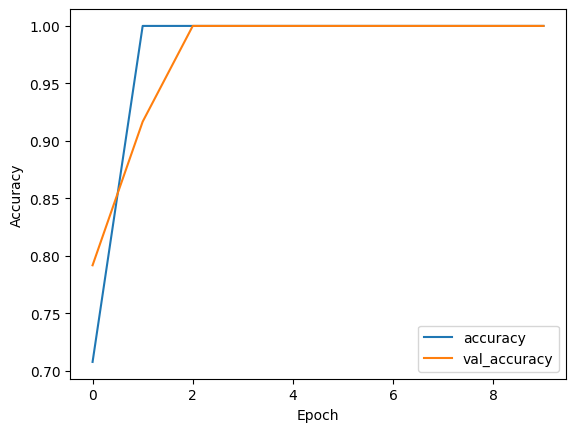

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Set Up Directories
train_dir = '/content/drive/MyDrive/OCR/Train_img_dir(jpg)'  # Path to training images
val_dir = '/content/drive/MyDrive/OCR/val_img_dir(jpg)'      # Path to validation images
test_dir = '/content/drive/MyDrive/OCR/test_img_dir(jpg)'    # Path to test images

# Step 2: Create DataFrame for file paths and single class label (e.g., 'label' = 0)
def create_dataframe(image_dir):
    image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]
    df = pd.DataFrame({
        'filename': image_paths,
        'label': [0] * len(image_paths)  # Assuming all belong to a single class (change if needed)
    })
    return df

# Step 3: Prepare DataFrames
train_df = create_dataframe(train_dir)
val_df = create_dataframe(val_dir)
test_df = create_dataframe(test_dir)

# Step 4: Data Preprocessing
image_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Step 5: Load images using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'  # 'raw' because we are not using multiple classes
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'
)

# Step 6: Build the MobileNet Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use sigmoid for binary classification (since single class)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs based on your needs
    validation_data=val_generator
)

# Step 9: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Step 10: Save the Model
model.save('/content/drive/MyDrive/OCR/mobilenet_model.h5')

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the trained model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.1898
Test accuracy: 1.00


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

# Step 1: Set Up Directories
base_dir = '/content/drive/MyDrive/OCR/output'  # Base directory for output
test_dir = '/content/drive/MyDrive/OCR/test_img_dir(jpg)'  # Path to your test images directory

# Step 2: Load and preprocess test images
def load_and_preprocess_images(test_dir):
    images = []
    filenames = []

    for filename in os.listdir(test_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other formats as needed
            img_path = os.path.join(test_dir, filename)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (224, 224))  # Resize to match model's input shape
            image = image.astype('float32') / 255.0  # Normalize to [0, 1]
            images.append(img_to_array(image))
            filenames.append(filename)

    return np.array(images), filenames

test_images, test_filenames = load_and_preprocess_images(test_dir)

# Step 3: Make predictions
predictions = model.predict(test_images)

# Step 4: Get the predicted class index for each test image
predicted_classes = np.argmax(predictions, axis=1)

# Step 5: Display and save predictions
output_dir = os.path.join(base_dir, "Predictions")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming you have a mapping for class indices to class labels
# Create a dummy label mapping if you don't have one
# For example, if you have 3 classes: {0: 'Class1', 1: 'Class2', 2: 'Class3'}
# Adjust according to your specific classes
class_labels = {0: 'Class1', 1: 'Class2', 2: 'Class3'}  # Example label mapping

for i, img in enumerate(test_images):
    # Get the predicted class label
    predicted_label = class_labels[predicted_classes[i]] if predicted_classes[i] in class_labels else "Unknown"

    # Save the original image for display (or any processing you want to do)
    original_image = cv2.imread(os.path.join(test_dir, test_filenames[i]))

    # Display the prediction as text on the image
    cv2.putText(original_image, f"Predicted: {predicted_label}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Save the predicted image with text to output directory
    output_file = f"pred_{i}.jpg"
    output_path = os.path.join(output_dir, output_file)

    cv2.imwrite(output_path, original_image)
    print(f"Saved predicted image to {output_path}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_0.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_1.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_2.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_3.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_4.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_5.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_6.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_7.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_8.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_9.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Predictions/pred_10.jpg
Saved predicted image to /content/drive/MyDrive/OCR/output/Pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


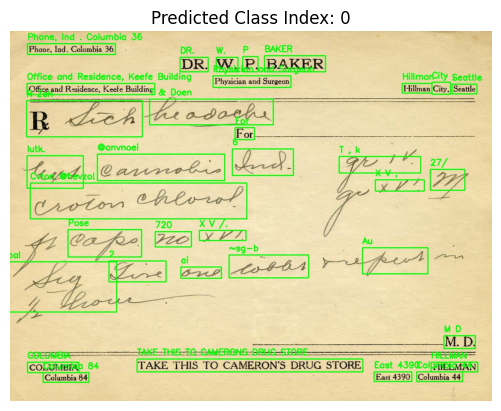

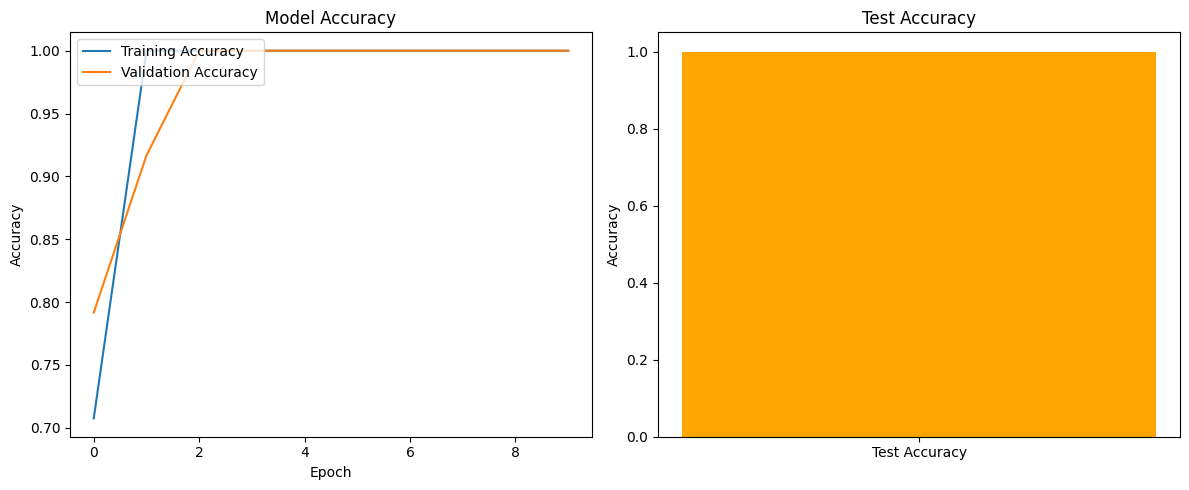

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_prediction(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))  # Resize to the input size of the model
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # Expand dimensions and normalize

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index

    # Display the image and the prediction
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title(f'Predicted Class Index: {predicted_class_index}')  # Show the predicted class index
    plt.axis('off')  # Hide axes
    plt.show()

def display_accuracy_scores(history, test_accuracy):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Plot training accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot test accuracy
    plt.subplot(1, 2, 2)
    plt.bar(['Test Accuracy'], [test_accuracy], color='orange')
    plt.title('Test Accuracy')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

# Replace with the path to one of your test images
image_path = '/content/drive/MyDrive/OCR/test_img_dir(jpg)/100_annotated.jpg'
display_prediction(image_path, model)

# Assuming 'history' is the training history returned from model.fit
# and 'test_accuracy' is the accuracy from model.evaluate
# Replace these with your actual variables
display_accuracy_scores(history, test_accuracy)


In [ ]:
#This segment is for loading the new image you choose
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_new_image(image_path, model, class_indices):
    # Load the image
    image = load_img(image_path, target_size=(224, 224))  # Resize to 224x224
    image_array = img_to_array(image)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array /= 255.0  # Scale the pixel values to [0, 1]

    # Make prediction
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the index of the highest score

    # Map the predicted class index to the corresponding label
    label_map = {v: k for k, v in class_indices.items()}  # Invert class_indices
    predicted_label = label_map[predicted_class_index]

    # Display the image and the prediction
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Example usage:
# Replace 'path/to/your/image.jpg' with the actual path to your new image
new_image_path = '/content/path/to/your/new_image.jpg'  # Provide the path to your new image
predict_new_image(new_image_path, model, test_generator.class_indices)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 626ms/step


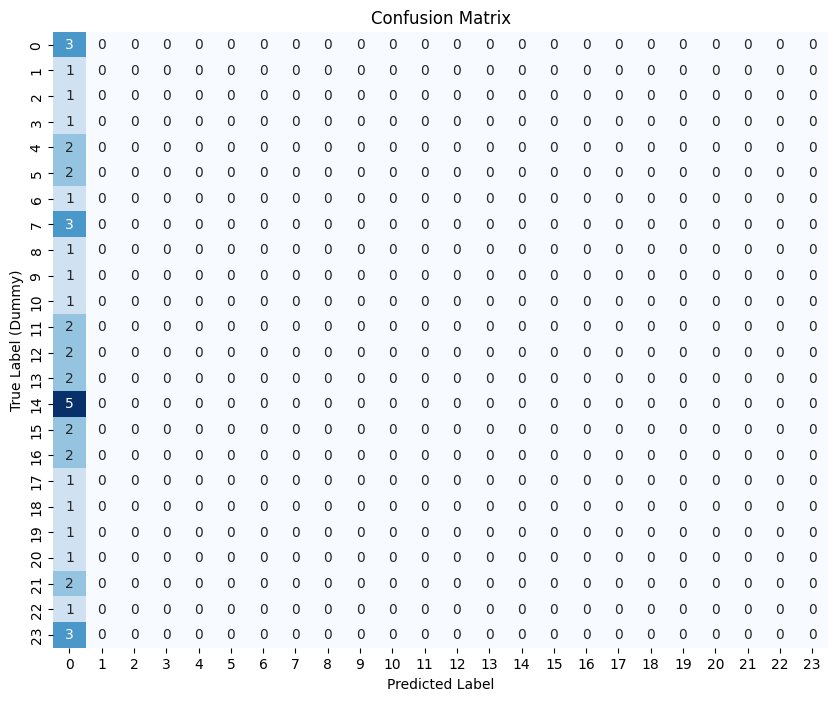

In [ ]:
import os
import numpy as np
import cv2  # OpenCV for image loading
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the image dimensions
image_height, image_width = 224, 224  # Adjust based on your model requirements

# Specify the directory containing your test images
test_img_dir = '/content/drive/MyDrive/OCR/test_img_dir(jpg)'

# Step 1: Load images manually
image_paths = [os.path.join(test_img_dir, img) for img in os.listdir(test_img_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
test_images = []

for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_width, image_height))  # Resize the image
    img = img / 255.0  # Rescale pixel values
    test_images.append(img)

test_images = np.array(test_images)

# Step 2: Generate predictions
predictions = model.predict(test_images, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Step 3: Create dummy true labels
num_classes = len(predicted_classes)  # Assuming all predictions belong to some classes
true_labels = np.random.randint(0, num_classes, size=len(predicted_classes))  # Random dummy labels

# Step 4: Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label (Dummy)')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 7,198,021 (27.46 MB)

 Trainable params: 2,387,969 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,775,940 (18.22 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


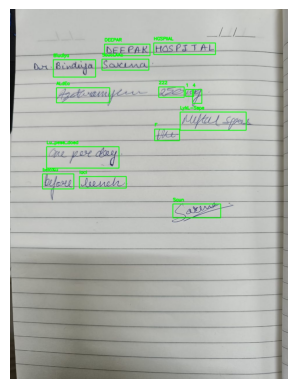

In [ ]:
import numpy as np
import cv2
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the model
model = tf.keras.models.load_model('/content/mobilenet_model (2).h5')

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to the target size
    img = cv2.resize(img, target_size)
    # Convert the image to a float32 numpy array and normalize it
    img = img.astype('float32') / 255.0
    # Expand dimensions to match model input shape (batch_size, height, width, channels)
    img = np.expand_dims(img, axis=0)
    return img, cv2.imread(image_path)

# Path to your image
image_path = '/content/00685f5d-561a-4bde-986e-38efd16de127.jpeg'

# Define the target size based on your model input shape
target_size = (224, 224)  # Update this size as per your model requirements

# Preprocess the image
processed_image, original_image = preprocess_image(image_path, target_size)

# Make predictions (optional if you don't need to store the result)
model.predict(processed_image)  # You can omit this if you don't need predictions

# Display the original image
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()
